# Capstone project 
### Investment and trading project - Predicting stock prices and returns based on machine learning

## 1. Data exploration: get data from quandle api. We primarily choose indices across the world. 

In [704]:
%matplotlib inline

import sys
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

local_python_path = '/Library/Python/2.7/site-packages'
sys.path.append(local_python_path)

In [705]:
df = pd.read_excel("./futures_data.xlsx", sheetname="ret",skiprows=1)

dates = df['dates']
gprice = df['GOLD']
esprice = df['ES1']
us1price = df['US1']
usdprice = df['USDCAD']
cl1price = df['CL1']
spxprice = df['SPX']
yahooprice = df['YHOO']

gold = df['GOLD.RET'][1:]
es = df['ES1.RET'][1:]
us = df['US1.RET'][1:]
usdcad = df['USDCAD.RET'][1:]
cl1 = df['CL1.RET'][1:]
spx = df['SPX.RET'][1:]
yhoo = df['YHOO.RET'][1:]
df

,dates,GOLD,GOLD.RET,ES1,ES1.RET,US1,US1.RET,USDCAD,USDCAD.RET,CL1,CL1.RET,SPX,SPX.RET,YHOO,YHOO.RET
0,2001-02-28,267.8,NaN,1242.00,NaN,105.59375,NaN,1.5364,NaN,27.39,NaN,1239.94,NaN,11.9063,NaN
1,2001-03-30,257.9,-0.037669,1169.25,-0.060360,104.18750,-0.013407,1.5757,0.025258,26.29,-0.040989,1160.33,-0.066359,7.8750,-0.413374
2,2001-04-30,264.4,0.024891,1254.25,0.070175,100.46875,-0.036345,1.5350,-0.026169,28.46,0.079311,1249.46,0.074007,10.0900,0.247852
3,2001-05-31,265.3,0.003398,1257.50,0.002588,100.18750,-0.002803,1.5380,0.001952,28.37,-0.003167,1255.82,0.005077,9.0550,-0.108228
4,2001-06-29,271.3,0.022364,1231.70,-0.020730,100.31250,0.001247,1.5143,-0.015530,26.25,-0.077666,1224.42,-0.025321,9.9950,0.098768
5,2001-07-31,266.2,-0.018977,1215.25,-0.013446,104.03125,0.036401,1.5335,0.012599,26.35,0.003802,1211.23,-0.010831,8.8100,-0.126198
6,2001-08-31,275.1,0.032887,1135.00,-0.068317,106.03125,0.019043,1.5512,0.011476,27.20,0.031749,1133.58,-0.066256,5.9300,-0.395863
7,2001-09-28,292.4,0.060988,1043.75,-0.083813,105.50000,-0.005023,1.5792,0.017890,23.43,-0.149200,1040.94,-0.085257,4.4050,-0.297284
8,2001-10-31,280.5,-0.041549,1060.75,0.016156,110.43750,0.045739,1.5884,0.005809,21.18,-0.100960,1059.78,0.017937,5.4400,0.211039
9,2001-11-30,273.9,-0.023811,1140.00,0.072052,104.78125,-0.052575,1.5730,-0.009743,19.44,-0.085725,1139.45,0.072484,7.7850,0.358420


In [706]:

def running_view(arr, window, axis=-1):
    """
    return a running view of length 'window' over 'axis'
    the returned array has an extra last dimension, which spans the window
    """
    shape = list(arr.shape)
    shape[axis] -= (window-1)
    assert(shape[axis]>0)
    return np.lib.index_tricks.as_strided(
        arr,
        shape + [window],
        arr.strides + (arr.strides[axis],))


In [707]:
goldMatrix = running_view(yhoo, 12)
#print gold
df_X = pd.DataFrame(goldMatrix)
#goldMatrix
features = df_X[0:-1]
Y = df_X[11][1:]
print Y

1      0.244762
2     -0.224227
3      0.081917
4     -0.081917
5     -0.113979
6     -0.246769
7     -0.072539
8      0.444069
9      0.202558
10    -0.111032
11     0.107194
12     0.135932
13     0.141533
14     0.030746
15     0.186217
16     0.091525
17    -0.049203
18     0.070084
19     0.058173
20     0.211148
21    -0.016609
22     0.046361
23     0.042393
24    -0.057835
25     0.089058
26     0.041622
27     0.193539
28     0.171610
29    -0.167054
30    -0.077260
         ...   
144    0.071323
145   -0.074327
146    0.001392
147   -0.036831
148    0.013758
149    0.019172
150    0.072691
151    0.056538
152    0.122272
153    0.116503
154   -0.024060
155   -0.138209
156    0.006571
157    0.003494
158   -0.042995
159    0.008655
160   -0.088717
161   -0.069011
162   -0.128751
163   -0.109020
164    0.208720
165   -0.052151
166   -0.016401
167   -0.119626
168    0.074423
169    0.146618
170   -0.005721
171    0.035958
172   -0.010066
173    0.016634
Name: 11, dtype: float64

In [708]:
df_X

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.413374,0.247852,-0.108228,0.098768,-0.126198,-0.395863,-0.297284,0.211039,0.358420,0.130476,-0.028590,-0.175846
1,0.247852,-0.108228,0.098768,-0.126198,-0.395863,-0.297284,0.211039,0.358420,0.130476,-0.028590,-0.175846,0.244762
2,-0.108228,0.098768,-0.126198,-0.395863,-0.297284,0.211039,0.358420,0.130476,-0.028590,-0.175846,0.244762,-0.224227
3,0.098768,-0.126198,-0.395863,-0.297284,0.211039,0.358420,0.130476,-0.028590,-0.175846,0.244762,-0.224227,0.081917
4,-0.126198,-0.395863,-0.297284,0.211039,0.358420,0.130476,-0.028590,-0.175846,0.244762,-0.224227,0.081917,-0.081917
5,-0.395863,-0.297284,0.211039,0.358420,0.130476,-0.028590,-0.175846,0.244762,-0.224227,0.081917,-0.081917,-0.113979
6,-0.297284,0.211039,0.358420,0.130476,-0.028590,-0.175846,0.244762,-0.224227,0.081917,-0.081917,-0.113979,-0.246769
7,0.211039,0.358420,0.130476,-0.028590,-0.175846,0.244762,-0.224227,0.081917,-0.081917,-0.113979,-0.246769,-0.072539
8,0.358420,0.130476,-0.028590,-0.175846,0.244762,-0.224227,0.081917,-0.081917,-0.113979,-0.246769,-0.072539,0.444069
9,0.130476,-0.028590,-0.175846,0.244762,-0.224227,0.081917,-0.081917,-0.113979,-0.246769,-0.072539,0.444069,0.202558


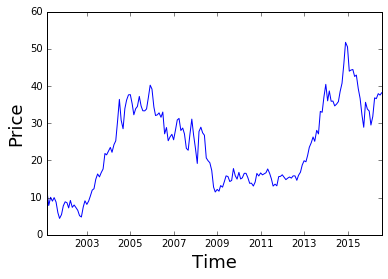

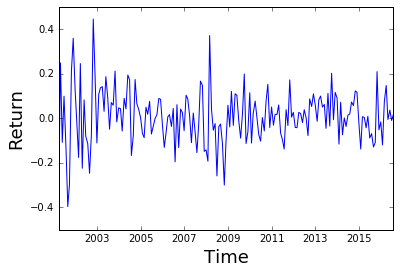

In [709]:
def getSingleNameStockPrice(symbol, start, end):
    """
    Adjusted close price from quandle.
    """
    import quandl
    mydata = quandl.get(symbol, start_date=start, end_date=end, authtoken="zYuLi6xBbvDYgsQJApiA")
    return mydata["Adjusted Close"]

def getReturns(price):
    """
    Get stock returns
    """
    return price.pct_change()[1:]

def getEsFuturesStockPrice(symbol, start, end):
    """
    Adjusted close price from quandle.
    """
    import quandl
    mydata = quandl.get(symbol, start_date=start, end_date=end, authtoken="zYuLi6xBbvDYgsQJApiA")
    return mydata["Close"]

yahoo_close = yahooprice
returns = yhoo
#yahoo_close = getStockPrice("SCF/CME_ES1_FW"", "2001-12-31", "2016-03-01")
#yahoo_close = quandl.get("SCF/CME_ES1_FW", start_date="2001-12-31", end_date="2016-03-01", authtoken="zYuLi6xBbvDYgsQJApiA")
#yahoo_close = getEsFuturesStockPrice("GOOG/AMEX_SHY", "2001-12-31", "2016-03-01")

#returns = getReturns(yahoo_close)
#returns
plt.figure(1)
plt.plot(dates, yahoo_close, label='Price')
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price',fontsize=18)

plt.figure(2)
plt.plot(dates[1:], returns, label='Return')
plt.xlabel('Time',fontsize=18)
plt.ylabel('Return',fontsize=18)

In [710]:
yahoo_close

0      11.9063
1       7.8750
2      10.0900
3       9.0550
4       9.9950
5       8.8100
6       5.9300
7       4.4050
8       5.4400
9       7.7850
10      8.8700
11      8.6200
12      7.2300
13      9.2350
14      7.3800
15      8.0100
16      7.3800
17      6.5850
18      5.1450
19      4.7850
20      7.4600
21      9.1350
22      8.1750
23      9.1000
24     10.4250
25     12.0100
26     12.3850
27     14.9200
28     16.3500
29     15.5650
        ...   
156    38.6700
157    35.9000
158    35.9500
159    34.6500
160    35.1300
161    35.8100
162    38.5100
163    40.7500
164    46.0500
165    51.7400
166    50.5100
167    43.9900
168    44.2800
169    44.4350
170    42.5650
171    42.9350
172    39.2900
173    36.6700
174    32.2400
175    28.9100
176    35.6200
177    33.8100
178    33.2600
179    29.5100
180    31.7900
181    36.8100
182    36.6000
183    37.9400
184    37.5600
185    38.1900
Name: YHOO, dtype: float64

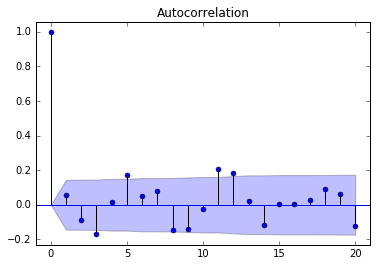

In [731]:
import statsmodels.graphics.tsaplots as tsplots
tsplots.plot_acf(returns, lags= 20)
plt.show()

In [712]:
returns[1:10]

2     0.247852
3    -0.108228
4     0.098768
5    -0.126198
6    -0.395863
7    -0.297284
8     0.211039
9     0.358420
10    0.130476
Name: YHOO.RET, dtype: float64

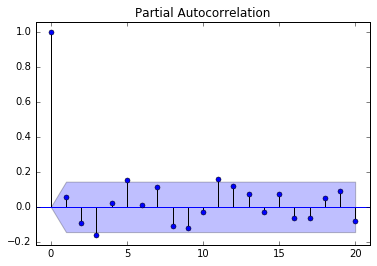

In [713]:
tsplots.plot_pacf(returns, lags= 20)
plt.show()

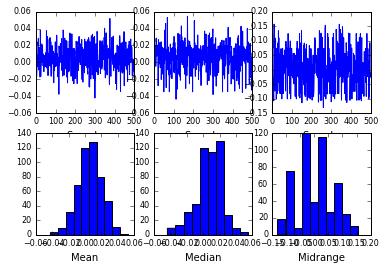

In [714]:
from pandas.tools.plotting import bootstrap_plot
bootstrap_plot(returns, size = 50)
plt.show()


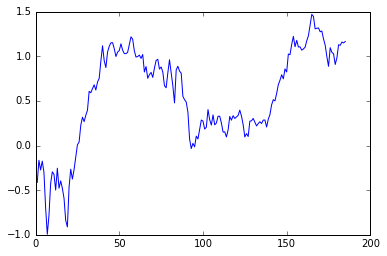

In [715]:
cum = np.cumsum(returns)
plt.plot(cum)

Find out the following facts about the data set
- Total number of data points
- Number of positive returns
- Number of negative returns
- Average annualized returns
- Standard deviation
- Sharpe ratio
- Cumulative returns

In [732]:
total_data = len(returns)
positive_returns = sum(x > 0 for x in returns)
negative_returns = sum(x < 0 for x in returns)
annualized_returns = np.mean(returns)*12
std = np.std(returns)*np.sqrt(12)
Sharpe = annualized_returns/std
Cumulative_returns = (yahoo_close[len(yahoo_close)-1]/yahoo_close[0])-1

print "total_data: {}".format(total_data)
print "positive returns: {}".format(positive_returns)
print "negative returns: {}".format(negative_returns)
print "annualized returns: {}".format(annualized_returns)
print "standard deviation: {}".format(std)
print "Sharpe ratio: {}".format(Sharpe)
print "Cumulative returnsL {}".format(Cumulative_returns)

total_data: 185
positive returns: 100
negative returns: 84
annualized returns: 0.0756003910991
standard deviation: 0.42220445876
Sharpe ratio: 0.17906109121
Cumulative returnsL 2.20754558511


## Preparing the data

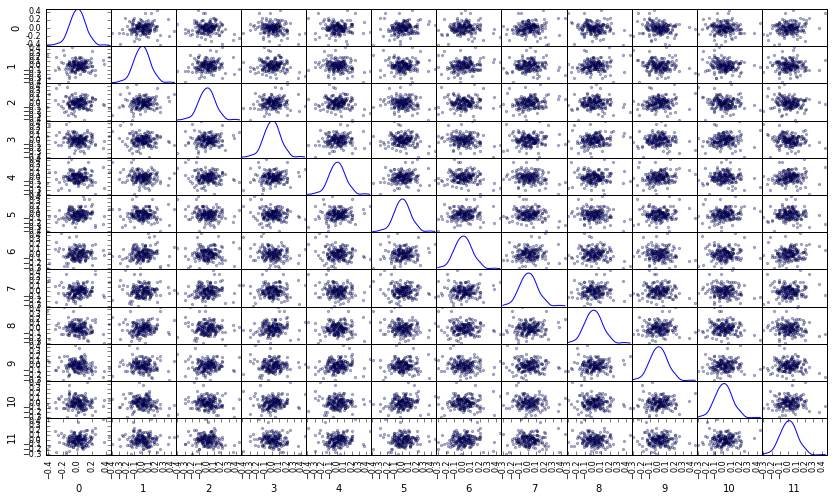

In [717]:
features = df_X[0:-1]

features
pd.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


## Volatility model. 
### Use volatility to determine the size of this instrument to maximize the return per risk. 

In [718]:
def volatility_estimate(r_t):
    var = 0
    r_m = np.mean(r_t)
    
    total_num = len(r_t)
    total_sum = total_num*(total_num+1)/float(2) 
    delta = 0.7
    if total_num == 1:
        return 0.4
    
    for i in range(0, total_num):
        delta_i = (i+1)/float(total_sum) #(1-delta)* delta_i * 
        var = var + (delta_i) * (r_t[i] - r_m)**2

    return np.sqrt(var * 261)


In [733]:
num_train = 0.75 * len(returns)
num_test = len(returns) - num_train
num_all = len(returns)
from sklearn.cross_validation import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(returns[1:-1], returns[2:len(returns)], test_size = float(num_test)/num_all, random_state = 42 )

X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size = float(num_test)/num_all, random_state = 42 )


### 1. Use supervised learning algorithms to predict stock returns. Use lagged returns as features. 

In [720]:
#y = returns[1:len(returns)]
#features = returns[0:len(returns)-1]
#plt.plot(features, y, 'o')

In [721]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11
169,-0.042995,0.008655,-0.088717,-0.069011,-0.128751,-0.109020,0.208720,-0.052151,-0.016401,-0.119626,0.074423,0.146618
150,0.201374,-0.006958,0.115690,0.089442,-0.116078,0.071323,-0.074327,0.001392,-0.036831,0.013758,0.019172,0.072691
164,0.116503,-0.024060,-0.138209,0.006571,0.003494,-0.042995,0.008655,-0.088717,-0.069011,-0.128751,-0.109020,0.208720
85,-0.053971,-0.024000,-0.258709,-0.037982,-0.025975,-0.113535,-0.299700,-0.107790,0.058220,-0.039286,0.120337,-0.032261
26,0.186217,0.091525,-0.049203,0.070084,0.058173,0.211148,-0.016609,0.046361,0.042393,-0.057835,0.089058,0.041622
157,0.001392,-0.036831,0.013758,0.019172,0.072691,0.056538,0.122272,0.116503,-0.024060,-0.138209,0.006571,0.003494
166,-0.138209,0.006571,0.003494,-0.042995,0.008655,-0.088717,-0.069011,-0.128751,-0.109020,0.208720,-0.052151,-0.016401
101,0.020049,0.198054,-0.113441,-0.060271,0.114140,-0.111471,0.019790,0.076671,0.000000,-0.074713,-0.102901,0.002886
68,0.025118,-0.055961,0.102969,0.086246,0.013838,-0.109666,0.023265,-0.056257,-0.154335,-0.022619,0.166301,0.147221
36,0.089058,0.041622,0.193539,0.171610,-0.167054,-0.077260,0.173455,0.065073,0.038753,0.001594,-0.067799,-0.087192


## Try different regression model

In [734]:
from sklearn.svm import SVC
#clf = SVC()
#from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
#clf = LinearRegression()# MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1) #SVC()
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree

clf1 = LinearRegression()
clf2 = tree.DecisionTreeRegressor()
clf3 = AdaBoostRegressor() #GradientBoostingClassifier()
# Fit model to training data
def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

    
train_classifier(clf1, X_train, y_train)
train_classifier(clf2, X_train, y_train)
train_classifier(clf3, X_train, y_train)

from sklearn.metrics import mean_squared_error
y_test_pred1 = predict_returns(clf1, X_test)
y_test_pred2 = predict_returns(clf2, X_test)
y_test_pred3 = predict_returns(clf3, X_test)

mse1 = mean_squared_error(y_test_pred1, y_test)
mse2 = mean_squared_error(y_test_pred2, y_test)
mse3 = mean_squared_error(y_test_pred3, y_test)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)

rmse1, rmse2, rmse3

#print len(y_test_pred)
#print len(y_test)
#sign_pred = [1 if i > 0 else 0 for i in y_test_pred]
#sign_true = [1 if i > 0 else 0 for i in y_test]
#print sign_pred
#print sign_true

#sign_count = [x*y for x,y in zip(sign_pred, sign_true)]
#print sign_count

Training LinearRegression...
Done!
Training time (secs): 0.003
Training DecisionTreeRegressor...
Done!
Training time (secs): 0.003
Training AdaBoostRegressor...
Done!
Training time (secs): 0.155


(0.10940840835787961, 0.15320747452190661, 0.095704997029284103)

In [723]:
threshold = 0
# Train a supervised model and use the model to predict future stock returns
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

from sklearn.svm import SVC
#clf = SVC()
#from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
#clf = LinearRegression()# MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1) #SVC()
from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()
clf = LinearRegression()
from sklearn.linear_model import LogisticRegression
# Fit model to training data

train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf  # you can inspect the learned model by printing it

def predict_returns(clf, X_test):
    return clf.predict(X_test)


Training LinearRegression...
Done!
Training time (secs): 0.004
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


0.0604927961757
0.934586151991


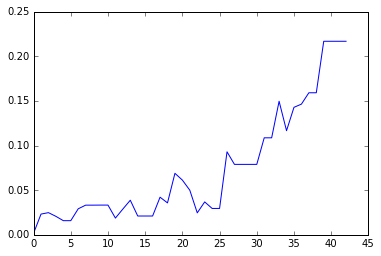

In [739]:

def sup_trading_strat(predict_returns, y_test, X_test):
    total_returns = []
    for i in range(1, len(predict_returns)):
        vol = volatility_estimate(X_test.loc[i, :])

        if predict_returns[i-1] >= threshold:
            total_returns.append(y_test[i] * 0.4 / vol)
            #total_returns.append(y_test[i])
        elif predict_returns[i-1] < -threshold:
            #total_returns.append(-y_test[i] * 0.4 / vol)
            total_returns.append(0)
            
    avg_ret = np.mean(total_returns) * 12
    avg_std = np.std(total_returns) * np.sqrt(12)
    sharpe = avg_ret/avg_std
    cum = np.cumsum(total_returns)
    return avg_ret, sharpe, cum, total_returns

y_test_copy = y_test.reset_index(drop=True)
X_test_copy = features.reset_index(drop=True)
avg_ret, sharpe, cum, total_returns = sup_trading_strat(y_test_pred3, y_test_copy, X_test_copy)
print avg_ret
print sharpe
plt.plot(cum)
#print y_test_pred
#print ""
#print y_test_copy
# calc avg returns, sharpe, cumulative

### 2. Use unsupervised learning algorithms to predict the sign of stock returns. Use lagged returns as features

In [725]:

X = features
#Y_label = [1 if i >0 else -1 for i in Y]
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(features, Y, test_size = float(num_test)/num_all, random_state = 42 )
y_train_label = [1 if i >0 else -1 for i in y_train_un]
y_test_label = [1 if i >0 else -1 for i in y_test_un]

In [740]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
clf11 = KNeighborsClassifier()
clf22 = GaussianNB()
clf33 = AdaBoostClassifier()

train_classifier(clf11, X_train_un, y_train_label)
train_classifier(clf22, X_train_un, y_train_label)
train_classifier(clf33, X_train_un, y_train_label)

def predict_return_sign(clf, X_test_un):
    return clf.predict(X_test_un)

pred_label1_t = predict_return_sign(clf11, X_train_un)
pred_label2_t = predict_return_sign(clf22, X_train_un)
pred_label3_t = predict_return_sign(clf33, X_train_un)

pred_label1 = predict_return_sign(clf11, X_test_un)
pred_label2 = predict_return_sign(clf22, X_test_un)
pred_label3 = predict_return_sign(clf33, X_test_un)

score1 = f1_score(pred_label1_t, y_train_label)
score2 = f1_score(pred_label2_t, y_train_label)
score3 = f1_score(pred_label3_t, y_train_label)
print score1
print score2
print score3

score11 = f1_score(pred_label1, y_test_label)
score22 = f1_score(pred_label2, y_test_label)
score33 = f1_score(pred_label3, y_test_label)
print score11
print score22
print score33

Training KNeighborsClassifier...
Done!
Training time (secs): 0.014
Training GaussianNB...
Done!
Training time (secs): 0.002
Training AdaBoostClassifier...
Done!
Training time (secs): 0.173
0.733333333333
0.748387096774
1.0
0.666666666667
0.620689655172
0.549019607843


In [727]:
def unsup_trading_strat(predict_returns, y_test, X_test):
    total_returns = []
    vols = []
    for i in range(1, len(predict_returns)):
        vol = volatility_estimate(X_test.loc[i, :])
        vols.append(vol)
        if predict_returns[i-1] > 0:
            total_returns.append(y_test[i] * 0.4 / vol)
        else:
            #total_returns.append(-y_test[i] * 0.4 / vol)
            total_returns.append(0)
    avg_ret = np.mean(total_returns) * 12
    avg_std = np.std(total_returns) * np.sqrt(12)
    sharpe = avg_ret/avg_std
    cum = np.cumsum(total_returns)
    return avg_ret, sharpe, cum, total_returns, vols


0.0758518831013
1.07725179165
[0.0064819727839810224, 0, 0, 0, -0.015933670329608678, -0.00022993530963407447, 0, 0.011790623388249381, 0, 0.00030800918377107663, 0, 0, 0.02196436423799792, 0.012797793221452275, -0.012146359940234467, 0, 0, 0.026614950273269062, -0.0090026836861626294, 0, 0, 0, -0.015887339319676789, 0.011042510173823971, -0.0065488994751101105, 0.01825455425952114, 0.05614903414809147, -0.0090331677197986338, 0, 0.034980205691594747, 0, 0.018150983285389406, 0, 0.060828036763403086, -0.052010558729220245, 0.051608671808536538, 0, 0, 0, 0.052726294555900173, 0, 0.008897191847419255, 0.0]


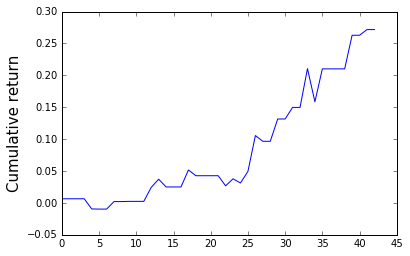

In [744]:

y_test_un_copy = y_test_un.reset_index(drop=True)
X_test_un_copy = X_test_un.reset_index(drop=True)
un_ret, un_sharpe, un_cum, new_returns, vols = unsup_trading_strat(pred_label3, y_test_un_copy, X_test_un_copy)
print un_ret
print un_sharpe
print new_returns
plt.plot(un_cum)
plt.ylabel("Cumulative return", fontsize = 15)

In [729]:
un_sharpe

1.0772517916477535

In [730]:
print volatility_estimate(y_test[0:10])
print "Average return: {}".format(un_ret)
print "Sharpe: {}".format(un_sharpe)
plt.plot(un_cum)

KeyError: 0

In [ ]:
vols

In [ ]:
X_test_copy

In [ ]:

X_test_copy = X_test.reset_index(drop=True)
X_test_copy.loc[1, :]
volatility_estimate(X_test_copy.loc[1, :])

In [ ]:
volatility_estimate(y_test)

In [ ]:
np.std(y_test)*np.sqrt(261)